# Exercise Sheet 2: Neural Networks 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def logistic(h,a=1):
    return 1/(1+np.exp(-a*h))
def dlogistic(h,a=1):
    return logistic(h,a)-np.power(logistic(h,a),2)

signtrafunc=lambda x: (np.sign(x)+1)/2

class neuron:    
    
    def __init__(self,w,b=0,trafunc=logistic,dtrafunc=dlogistic):
        self.w=np.array(w)
        self.b=np.array(b)
        self.trafunc=trafunc
        self.dtrafunc=dtrafunc
        
    def out(self, x):
        return self.trafunc(np.dot(self.w,x)-self.b)    

## Task 1: Gradient Descent on a neuron (3 points - programming)
Rewrite the neuron class given and include the Gradient Descent training algorithm as a method. To this extent, concentrate on each neuron individually by giving it the delta of the neurons connected to it's ouptut and the corresponding weights as parameters.

Also, add the derivative of the transfer function as a method and safe the last input $x$, last output $y$, last activation $h$ and last delta $\delta$ values as object attributes, whenever they are recalculated.
The values of $h$,$x$,$y$ and $o$ are all to be taken as those of the current training data (= their last calculation).

The forumla you need is: $\delta_i = f'(h_i) \sum_k w_k \delta_k$, where i is the index of the current neuron and k is the index of the following neurons (connected to it's output). This formulation is needed to be able to use it for the Backpropagation later on. For a single neuron as for the last layer neurons, the delta of the following neuron is replaced by the error graident of the output $\delta_k=\left(y-o\right)$ and the corresponding weight is $w_k=1$ as every output neuron in the model has only one unscaled output.
The train function updates the weights by the gradient  descent weight update rule $w(t+1)=w(t)-\eta\delta_i(t)\cdot x(t)$.


In [2]:
class neuron:    
    
    def __init__(self,w,b,trafunc=logistic,dtrafunc= dlogistic ):
        self.w=np.array(w)
        self.b=np.array(b)
        self.trafunc=trafunc
        self.dtrafunc=dtrafunc
    
    def out(self, x):
        self.lastinput = x
        self.lasth = np.dot(self.w,x)-self.b
        self.lastout = self.trafunc(self.lasth)  
        return self.lastout
    
    def dout(self, x):
        return self.dtrafunc(np.dot(self.w,x)-self.b)
    
    def delta(self,deltanext,weightsnext):   
        self.lastdelta = self.dout(self.lastinput)* np.dot(weightsnext, deltanext)
        return self.lastdelta
    
    def train(self,deltanext,weightsnext,learnrate=0.1):  
        self.w = self.w - learnrate*self.delta(deltanext, weightsnext)*self.lastinput
        self.b = self.b + (learnrate * self.lastdelta) 
        return self.lastdelta

## Task 2: logical functions (2 points - programming)
Train a single neuron on the logical functions below for a two-dimensional input $x$. Use instances of the neuron class above to build the equivalents to logical "or","and" and "xor"-functions and test them for 2-dimensional input vectors *x* resembling all possibilities of combinations ([0,0] [1,0], [0,1], [1,1]). Do 10.000 iterations and plot the evolution of the error (the error over the iteration number). You don't need to implement a stopping criterion.

Set the learning rate to $\eta=1$ and initialize the weight $w$ and the bias $b$ randomly with normal distribution (np.random.randn). Use the logistic function.

In the next cell you find an exemplary random number generator and the corresponding functions you can use for sample creation in every single iteration. In every iteration use the random input $x$, the neuron output *$y=$neuron.out($x$)* and the training data $o=yourlogicalfunction(x)$

If you haven't succeeded with task 1, you can import Exercise2helperPy36 or Exercise2helperPy27 depending on your python version. The syntax of the conained neuron class is: n1=Exercise2helper.neuron(np.random.randn(2),np.random.randn(1)) for initialization and train(deltanext,weightsnext,learnrate=0.1) for training. For a single neuron as for the last layer neurons, the delta of the following neuron (deltanext) is replaced by the error graident of the output $\delta_k=\left(y-o\right)$ and the corresponding weight is $w_k=1$ as every output neuron in the model has only one unscaled output.

In [3]:
import Exercise2helper36 as helper

#for one single point
x=np.random.randint(2,size=2)
o=x[0] & x[1]


### a) AND function

0, 0
[5.81504371e-05]
0, 1
[0.03462839]
1, 0
[0.03570635]
1, 1
[0.95805366]


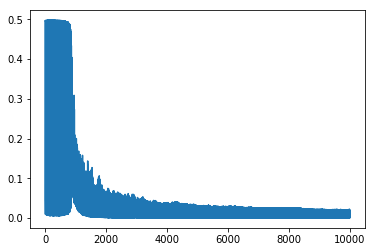

In [4]:
#initialize

n1 = neuron(np.random.randn(2), np.random.randn(1))


y = n1.out(x)
o=x[0] & x[1]
deltanext = y - o
weightsnext = 1
n1.train(deltanext, weightsnext, learnrate=1.0)

it = 10000
error = np.zeros(it)

for i in range(it):
    error[i] = 1/2*np.linalg.norm(deltanext, 2)
    x=np.random.randint(2,size=2)
    o=x[0] & x[1]
    y = n1.out(x)
    
    deltanext = y - o
    weightsnext = 1
    n1.train(deltanext, weightsnext, learnrate=1.0)
    
print("0, 0")
print(n1.out([0, 0]))
print("0, 1")
print(n1.out([0, 1]))
print("1, 0")
print(n1.out([1, 0]))
print("1, 1")
print(n1.out([1, 1]))

plt.plot(error)

### b) OR function

0, 0
[0.03317393]
0, 1
[0.97905381]
1, 0
[0.97859747]
1, 1
[0.99998395]


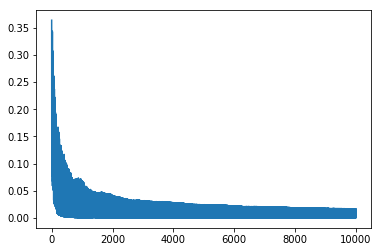

In [5]:
#initialize
n1 = neuron( np.random.randn(2),  np.random.randn(1))


y = n1.out(x)
o=x[0] | x[1]
deltanext = y - o
weightsnext = 1
n1.train(deltanext, weightsnext, learnrate=1.0)

it = 10000
error = np.zeros(it)

for i in range(it):
    error[i] = 1/2*np.linalg.norm(deltanext, 2)
    x=np.random.randint(2,size=2)
    o=x[0] | x[1]
    y = n1.out(x)
    
    deltanext = y - o
    weightsnext = 1
    n1.train(deltanext, weightsnext, learnrate=1.0)

print("0, 0")
print(n1.out([0, 0]))
print("0, 1")
print(n1.out([0, 1]))
print("1, 0")
print(n1.out([1, 0]))
print("1, 1")
print(n1.out([1, 1]))
plt.plot(error)

### c) XOR function

0, 0
[0.39373458]
0, 1
[0.46439025]
1, 0
[0.50347826]
1, 1
[0.57514482]


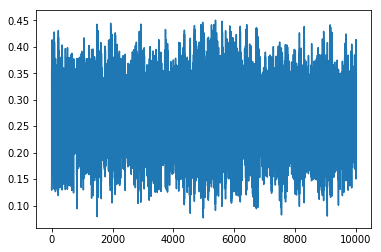

In [6]:
#initialize
n1 = neuron( np.random.randn(2),  np.random.randn(1))


y = n1.out(x)
o=x[0] ^ x[1]
deltanext = y - o
weightsnext = 1
n1.train(deltanext, weightsnext, learnrate=1.0)

it = 10000
error = np.zeros(it)

for i in range(it):
    error[i] = 1/2*np.linalg.norm(deltanext, 2)
    x=np.random.randint(2,size=2)
    o=x[0] ^ x[1]
    y = n1.out(x)
    
    deltanext = y - o
    weightsnext = 1
    n1.train(deltanext, weightsnext, learnrate=1.0)
    

print("0, 0")
print(n1.out([0, 0]))
print("0, 1")
print(n1.out([0, 1]))
print("1, 0")
print(n1.out([1, 0]))
print("1, 1")
print(n1.out([1, 1]))
plt.plot(error)

not converging, because one single neuron is not able to learn the XOR function. the minimum is two neurons.

## Task 3: MLP layer (2 points - programming)
Use the class "neuron" to construct a neural layer class "MLPlayer" for a Multi-Layer Perceptron (MLP).
It should contain a list "MLPlayer.nodes" which is a list of the single neurons. 
Also, there should be a method "MLPlayer.out(x)" that returns the outputs of the single neurons as a list for the different neurons' current weights and bias of the input vector "x". Initialize the weights and the biases of the single neurons randomly with normal distribution by default (np.random.randn()).

Include a method "MLPlayer.train(deltanext,W,learnrate)" which iterates the training over the nodes by calling their "train()" method with the deltas of the nextlayers and the corresponding weights. W is matrix consisiting of the weights of of all neurons in the next layer. It should return the deltas and weight matrix W of the current layer.

The number of outputs is equivalent to the number of nodes in the layer and the number of inputs corresponds with the number of weights per neuron. The number of neurons and the number of weights per neuron should be passed to the initialization method.

In [7]:
class MLPlayer:
    
    def __init__(self,NodeNo,WeightNo,weightinit=np.random.randn,biasinit=np.random.randn,trafunc=logistic,dtrafunc=dlogistic):
        self.NodeNo = NodeNo
        self.WeightNo = WeightNo
        #weights is a matrix where all the weights for this layer are stored
        self.weights = np.zeros((self.NodeNo,self.WeightNo))
        
        self.neurons = []
        for i in range(NodeNo):
             self.neurons.append(neuron( weightinit(WeightNo),  biasinit(1), trafunc=trafunc,dtrafunc= dtrafunc))   
        
    def out(self,x):
        returnobj = np.zeros(len(self.neurons))
        for n in range(len(self.neurons)):
            returnobj[n] = self.neurons[n].out(x)
        
        return returnobj
#         return [self.neurons[n].out(x) for n in range(len(self.neurons))]
    
    def train(self,deltanext,W,learnrate=0.1):        
        #init the arrays for storing the deltas and the weights of the layer
        deltas = np.zeros(self.NodeNo)    
        for i in range(self.NodeNo):
            deltas[i] = self.neurons[i].train(deltanext[i],W[i],learnrate= learnrate)
            self.weights[i,:] = self.neurons[i].w
            
        return deltas, self.weights

## Task 5: Backpropagation in MLP (7 points - programming)

Construct a class "MLP" with a list of layers of type "MLPlayer" called "MLP.layers" Also, there should be a method "MLP.out(x)" that returns the outputs of the whole network of the input vector "x".

Make sure, that the size of the weight vector is bound to the number of inputs for the first layer and that the number of inputs for the following layers has to correspond with the number of neurons in the layer before. The number of outputs equals the number of neurons in the last layer.

* The init function gets the number of inputs *x* and the number of nodes for each layer as a list. The number of neurons per layer and the number of inputs should be passed to the initialization method.

* Include the backpropagation training algorithm as a method "MLP.train()" into the class. The passed arguments should consist of the number of iteations (no stopping criteria in this case), the training input and the training output - both as function pointers - as well as the learning rate. It should iterate over the layers, which themselves iterate over their neurons. Deltas and W will allways be the input to the previous layer.

* The function x_train has to produce a random array of inputs of size [NoInputs,] and o_train has to produce the corresponding target function output. They should work without an argument passed and the target training output $o$ should be calculated using only that vector $x$.

* The output of the method *train()* should consist of the sum-of-squares error within each iteration.

In [8]:
class MLP:
    def __init__(self, NoInputs, ListNoNeuronsPerLayer, weightinit=np.random.randn,biasinit=np.random.randn,trafunc=logistic,dtrafunc=dlogistic):
        self.layers = []
        self.NoInputs = NoInputs
        
        #first layer is the input layer
        self.layers.append(MLPlayer(ListNoNeuronsPerLayer[0], NoInputs))
        
        for n in range(1, len(ListNoNeuronsPerLayer)):
            self.layers.append(MLPlayer(ListNoNeuronsPerLayer[n], ListNoNeuronsPerLayer[n-1]))
        
    def out(self, x):
        #for layer 1 the output of the previous layer is x
        output = x
        
        #iterating over the the layers
        for l in self.layers:
            output = l.out(output)
        return output
    

    def train(self, iterations, x_in, o_in, learnrate=0.1):        
        errors = np.zeros(iterations)
        self.noIterations = iterations
        
        x = x_in()
        o = o_in(x)
        
        for it in range(iterations):
            desired_output = o[it]
            actual_output = self.out(x[it])
            deltanext_last = actual_output - desired_output 
            errors[it] = 1/2*np.linalg.norm(np.array(deltanext_last),2)
            weightsnext = np.full(len(deltanext_last), 1) 
            deltanext, W = self.layers[len(self.layers) - 1].train(deltanext_last, weightsnext, learnrate=learnrate) 
            #this is so that I can make it dot multiplication with weights of the next layer later on.
            # -1 is because len() is inclusive, and -1 is for the next layer we want to work on after this step.
            deltanext = np.full((self.layers[len(self.layers) - 2].NodeNo, len(deltanext)), deltanext) 
            for layer in reversed(range(len(self.layers) - 1)):
                #we rotate the vector for weight, so that we can w1_1.delta1 . w2_1.delta2 for the first node 
                deltanext, W = self.layers[layer].train(deltanext, W.T, learnrate=learnrate)
               
        return errors
    
    
    def x_train(self):
        #create n (=number of iterations) samples of random vecotors of noInputs size containing only [0,1]
        return np.random.randint(2, size=(self.noIterations, self.NoInputs))
    def o_train(self,x):
        o = x[:,0]^x[:,1] #XOR function
        #here it only works with 1-dim output
        return o[:,np.newaxis]

## Task 6 Train an MLP on the XOR (1 point - programming)
Train a Multi-Layer-Perceptron on the logical "xor"-function. Do 10.000 iterations and plot the evolution of the error. You don't need to implement a stopping criterion. Use the logistic function.

Set the learning rate to $\eta=1$.

Investigate the following steps:

a) The network should consist of two layers, where the first has the two input neurons and the second only one output neuron. Does it always converge?

b) The network should consist of two layers, where the first has the three  input neurons and the second only one output neuron. Does it now always converge?

What can we learn from this?

If you haven't succeeded with task 5, you can import Exercise2helperPy36 or Exercise2helperPy27 (depending on your python version 3.6 or 2.7). The syntax of the contained MLP class is:
*NeuralNetwork=MLP(NoInputs,ListNoNeuronsPerLayer)*
for initialization and 
*errors=NeuralNetwork.train(NoIterations,x, o ,learnrate)* for training. $x$ and $o$ can either be functions as defined in task 5 or arrays of samples. If they are functions, $x$ has to produce a random array of inputs of size [NoInputs,] and $o(x)$ has to produce the corresponding target function output. If they are samples they have to have the shape *x.shape=[NoIterations,NoInputs]* and *o.shape=[NoIterations,NoOutputs]*.



0, 0
[0.02313718]
0, 1
[0.97260865]
1, 0
[0.97259471]
1, 1
[0.02728191]


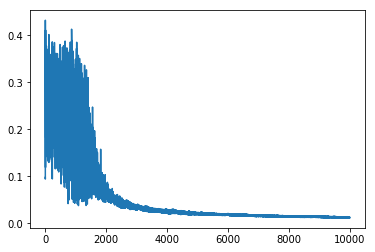

In [9]:
NeuralNetwork = MLP(2, [2, 1]) #2 input nodes, and 1 output node. Does not always converge


errors=NeuralNetwork.train(10000,NeuralNetwork.x_train,NeuralNetwork.o_train,1) 
plt.plot(errors)
print("0, 0")
print(NeuralNetwork.out([0, 0]))
print("0, 1")
print(NeuralNetwork.out([0, 1]))
print("1, 0")
print(NeuralNetwork.out([1, 0]))
print("1, 1")
print(NeuralNetwork.out([1, 1]))


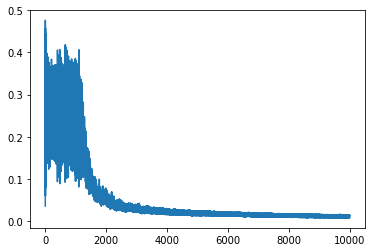

In [10]:
NeuralNetwork = MLP(2, [3, 1]) #3 input nodes, and 1 output node. Always converge
errors=NeuralNetwork.train(10000,NeuralNetwork.x_train,NeuralNetwork.o_train,1) 
plt.plot(errors)

# What can we learn from this?
the neural network with three input nodes is more stable than the network with 2 input nodes. it is always learning the XOR function with training.
in the two input nodes case exists the possibility of a bad (random) initialization of the weights, and the neurons are not able to learn the XOR function in that case. 